In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Set some display options for better readability
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style('whitegrid')

# Connect to the SQLite database
db_engine = create_engine('sqlite:///sales_data.db')

# Load the data from the 'sales' table into a DataFrame
try:
    df = pd.read_sql_query("SELECT * FROM sales", db_engine)
    print("Successfully loaded data from database.")
    print(f"DataFrame contains {len(df)} rows.")
except Exception as e:
    print(f"Error loading data: {e}")

# Display the first few rows and data types to confirm it loaded correctly
df.head()

Successfully loaded data from database.
DataFrame contains 2664 rows.


,SaleDate,Item,Quantity,Price,Category,TotalSales,source_file
0,2003-02-24 00:00:00.000000,S10_1678,30,95.70,Motorcycles,2871.00,sales_data_sample.csv
1,2003-05-07 00:00:00.000000,S10_1678,34,81.35,Motorcycles,2765.90,sales_data_sample.csv
2,2003-07-01 00:00:00.000000,S10_1678,41,94.74,Motorcycles,3884.34,sales_data_sample.csv
3,2003-08-25 00:00:00.000000,S10_1678,45,83.26,Motorcycles,3746.70,sales_data_sample.csv
4,2003-10-10 00:00:00.000000,S10_1678,49,100.00,Motorcycles,4900.00,sales_data_sample.csv


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SaleDate     2664 non-null   object 
 1   Item         2664 non-null   object 
 2   Quantity     2664 non-null   int64  
 3   Price        2664 non-null   float64
 4   Category     2664 non-null   object 
 5   TotalSales   2664 non-null   float64
 6   source_file  2664 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 145.8+ KB


--- Total Sales by Product Category ---
Category
Classic Cars       2817515.14
Vintage Cars       1528213.53
Motorcycles         941683.81
Trucks and Buses    896017.45
Planes              807105.12
Ships               599668.69
Trains              194804.26
Name: TotalSales, dtype: float64


C:\Users\Ntsika\AppData\Local\Temp\ipykernel_18160\2060243626.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')


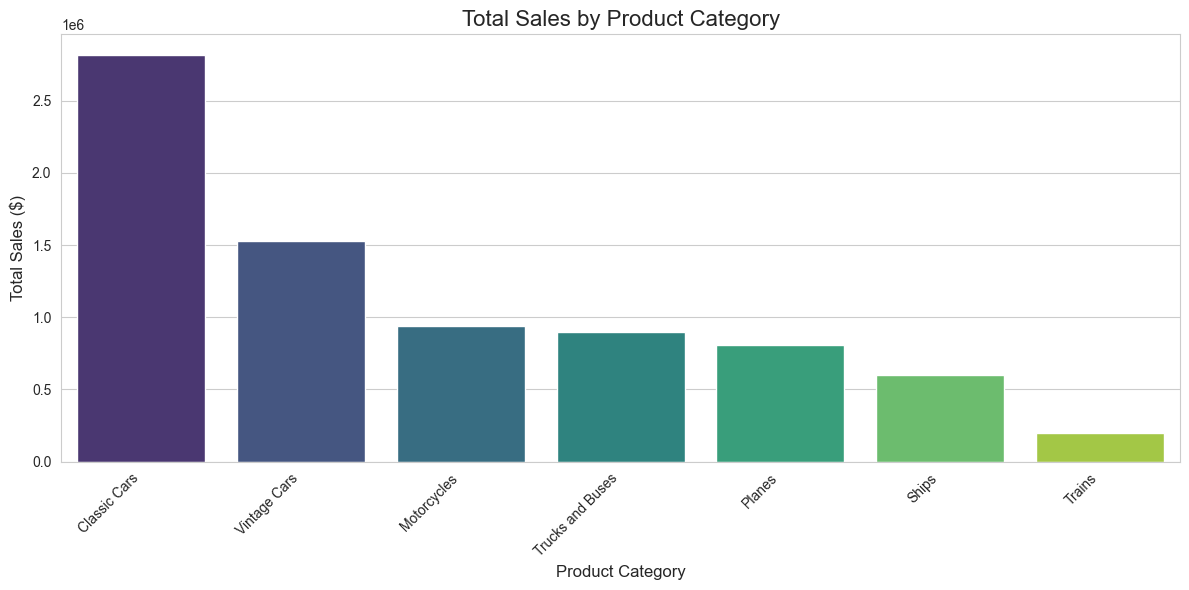

In [3]:
# Group by category and sum the sales, then sort
category_sales = df.groupby('Category')['TotalSales'].sum().sort_values(ascending=False)

print("--- Total Sales by Product Category ---")
print(category_sales)

# --- Visualization ---
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust plot to prevent labels from overlapping
plt.show()

C:\Users\Ntsika\AppData\Local\Temp\ipykernel_18160\336808904.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['TotalSales'].resample('M').sum()



--- Total Sales by Month ---
SaleDate
2003-01-31   107885.96
2003-02-28   120036.80
2003-03-31   144096.23
2003-04-30   169421.03
2003-05-31   163654.12
2003-06-30   139552.84
2003-07-31   149869.73
2003-08-31   166026.32
2003-09-30   211045.86
2003-10-31   421885.09
2003-11-30   850203.27
2003-12-31   210117.21
2004-01-31   268015.87
2004-02-29   258389.05
2004-03-31   166958.56
2004-04-30   172935.80
2004-05-31   180469.64
2004-06-30   158696.24
2004-07-31   271103.61
2004-08-31   386106.59
2004-09-30   263854.26
2004-10-31   452796.13
2004-11-30   874092.26
2004-12-31   313055.93
2005-01-31   283680.46
2005-02-28   289902.30
2005-03-31   315131.94
2005-04-30   106220.56
2005-05-31   169804.34
Freq: ME, Name: TotalSales, dtype: float64


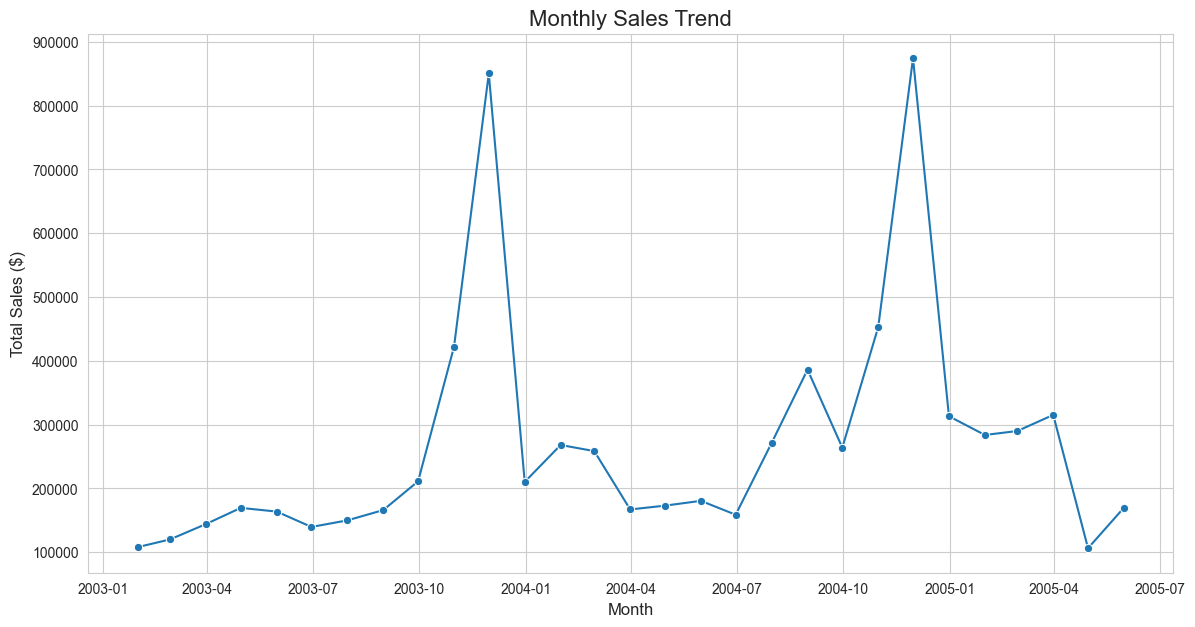

In [4]:
# Ensure 'SaleDate' is a datetime object
df['SaleDate'] = pd.to_datetime(df['SaleDate'])

# Set the SaleDate as the index to perform time-series resampling
df.set_index('SaleDate', inplace=True)

# Resample the data by month ('M') and sum the TotalSales
monthly_sales = df['TotalSales'].resample('M').sum()

print("\n--- Total Sales by Month ---")
print(monthly_sales)

# --- Visualization ---
plt.figure(figsize=(14, 7))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.show()